In [1]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
	sys.path.append(p)

# And standard list of subdirectories
if '%s\\pyuoi' % p not in sys.path:
	sys.path.append('%s\\pyuoi' % p)

from pyuoi.linear_model.lasso import UoI_Lasso
from pyuoi.linear_model.elasticnet import UoI_ElasticNet

if '%s\\uoicorr' % p not in sys.path:
    sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir

In [2]:
dat = postprocess_dir('C:\\Users\\Ankit\\nse\\uoicorr\\data\\01202019')

(1440, 21)


In [8]:
uoienr2 = dat[dat['est_score'] == 'r2']

In [3]:
dat2 = postprocess_dir('C:\\Users\\Ankit\\nse\\uoicorr\\data\\01172019')

(528, 21)


In [7]:
lassor2 = dat2.loc[(dat2['exp_type'] == 'UoILasso') & (dat2['est_score'] == 'r2')]

In [ ]:
# Compare results of false positives, false negatives, selection accuracy, and r^2 against UoI_Lasso for different l1_ratios
# beginning with r^2 estimation score

In [29]:
# Select data for each level of sparsity, for l1_ratio = 0.1

d = []
# d.append(uoienr2.loc[(uoienr2['sparsity'] == 0.2)])
d.append(uoienr2.loc[(uoienr2['sparsity'] == 0.4) & (uoienr2['l1_ratios'] == 0.1)])
d.append(uoienr2.loc[(uoienr2['sparsity'] == 0.6) & (uoienr2['l1_ratios'] == 0.1)])
d.append(uoienr2.loc[(uoienr2['sparsity'] == 0.8) & (uoienr2['l1_ratios'] == 0.1)])
d.append(uoienr2.loc[(uoienr2['sparsity'] == 1) & (uoienr2['l1_ratios'] == 0.1)])

dd = []
# dd.append(lassor2.loc[(lassor2['sparsity'] == 0.2)])
dd.append(lassor2.loc[(lassor2['sparsity'] == 0.4)])
dd.append(lassor2.loc[(lassor2['sparsity'] == 0.6)])
dd.append(lassor2.loc[(lassor2['sparsity'] == 0.8)])
dd.append(lassor2.loc[(lassor2['sparsity'] == 1)])

### False Negatives

In [75]:
def plot_data(est_score, l1_ratio):
    uoienr2 = dat[dat['est_score'] == est_score]
    lassor2 = dat2.loc[(dat2['exp_type'] == 'UoILasso') & (dat2['est_score'] == est_score)]
    
    # Select data for each level of sparsity

    d = []
    # d.append(uoienr2.loc[(uoienr2['sparsity'] == 0.2)])
    d.append(uoienr2.loc[(uoienr2['sparsity'] == 0.4) & (uoienr2['l1_ratios'] == l1_ratio)])
    d.append(uoienr2.loc[(uoienr2['sparsity'] == 0.6) & (uoienr2['l1_ratios'] == l1_ratio)])
    d.append(uoienr2.loc[(uoienr2['sparsity'] == 0.8) & (uoienr2['l1_ratios'] == l1_ratio)])
    d.append(uoienr2.loc[(uoienr2['sparsity'] == 1) & (uoienr2['l1_ratios'] == l1_ratio)])

    dd = []
    # dd.append(lassor2.loc[(lassor2['sparsity'] == 0.2)])
    dd.append(lassor2.loc[(lassor2['sparsity'] == 0.4)])
    dd.append(lassor2.loc[(lassor2['sparsity'] == 0.6)])
    dd.append(lassor2.loc[(lassor2['sparsity'] == 0.8)])
    dd.append(lassor2.loc[(lassor2['sparsity'] == 1)])
    
    L = [0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    sparsity = [0.4, 0.6, 0.8, 1]
    fig, ax = plt.subplots(2, 2, figsize = (15, 10))
    for i in range(len(d)):
        d1 = dd[i]
        d2 = d[i]

        nonzero_beta = int(sparsity[i] * 60)

        # Organize by block_size and L
        fn_avg_uoil = [np.mean(d1.iloc[j].fn/nonzero_beta) for j in range(len(L))]
        fn_avg_uoien = [np.mean(d2.iloc[j].fn/nonzero_beta) for j in range(len(L))]


        a = ax[np.unravel_index(i, (2, 2))]
        a.plot(L, fn_avg_uoil, '-o')
        a.plot(L, fn_avg_uoien, '-o')

    ax[np.unravel_index(0, (2, 2))].set_ylabel('False Negative Rate', fontsize=16)
    ax[np.unravel_index(0, (2, 2))].set_title('Sparsity = 0.4', fontsize=18)
    ax[np.unravel_index(1, (2, 2))].set_title('Sparsity = 0.6', fontsize=18)
    ax[np.unravel_index(2, (2, 2))].set_title('Sparsity = 0.8', fontsize=18)
    ax[np.unravel_index(2, (2, 2))].set_xlabel('Falloff Lengthscale', fontsize=16)
    ax[np.unravel_index(3, (2, 2))].set_title('Sparsity = 1', fontsize=18)
    ax[np.unravel_index(3, (2, 2))].legend(['UoI_Lasso', 'UoI_ElasticNet', 'Elastic Net'], loc = 'upper right', bbox_to_anchor=(1, 1))
    fig.suptitle('False Negatives')
    plt.savefig('../figs/01202019/EstScore%s_l1ratio%f_fn.png' % (est_score, l1_ratio))
    plt.close()
    
    L = [0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    sparsity = [0.4, 0.6, 0.8, 1]
    fig, ax = plt.subplots(2, 2, figsize = (15, 10))
    for i in range(len(d)):
        d1 = dd[i]
        d2 = d[i]

        nonzero_beta = int(sparsity[i] * 60)

        # Organize by block_size and L
        fn_avg_uoil = [np.mean(d1.iloc[j].fp/nonzero_beta) for j in range(len(L))]
        fn_avg_uoien = [np.mean(d2.iloc[j].fp/nonzero_beta) for j in range(len(L))]


        a = ax[np.unravel_index(i, (2, 2))]
        a.plot(L, fn_avg_uoil, '-o')
        a.plot(L, fn_avg_uoien, '-o')

    ax[np.unravel_index(0, (2, 2))].set_ylabel('False Positives Rate', fontsize=16)
    ax[np.unravel_index(0, (2, 2))].set_title('Sparsity = 0.4', fontsize=18)
    ax[np.unravel_index(1, (2, 2))].set_title('Sparsity = 0.6', fontsize=18)
    ax[np.unravel_index(2, (2, 2))].set_title('Sparsity = 0.8', fontsize=18)
    ax[np.unravel_index(2, (2, 2))].set_xlabel('Falloff Lengthscale', fontsize=16)
    ax[np.unravel_index(3, (2, 2))].set_title('Sparsity = 1', fontsize=18)
    ax[np.unravel_index(3, (2, 2))].legend(['UoI_Lasso', 'UoI_ElasticNet', 'Elastic Net'], loc = 'upper right', bbox_to_anchor=(1, 1))
    fig.suptitle('False Positives')
    plt.savefig('../figs/01202019/EstScore%s_l1ratio%f_fp.png' % (est_score, l1_ratio))
    plt.close()
    
    L = [0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    sparsity = [0.4, 0.6, 0.8, 1]
    fig, ax = plt.subplots(2, 2, figsize = (15, 10))
    for i in range(len(d)):
        d1 = dd[i]
        d2 = d[i]

        nonzero_beta = int(sparsity[i] * 60)

        # Organize by block_size and L
        fn_avg_uoil = np.array([np.mean(d1.iloc[j].fn/nonzero_beta) for j in range(len(L))])
        fn_avg_uoien = np.array([np.mean(d2.iloc[j].fn/nonzero_beta) for j in range(len(L))])

        fp_avg_uoil = np.array([np.mean(d1.iloc[j].fp/nonzero_beta) for j in range(len(L))])
        fp_avg_uoien = np.array([np.mean(d2.iloc[j].fp/nonzero_beta) for j in range(len(L))])

        sa_avg_uoil = 1 - (fn_avg_uoil + fp_avg_uoil)
        sa_avg_uoien = 1 - (fn_avg_uoien + fp_avg_uoien)

        a = ax[np.unravel_index(i, (2, 2))]
        a.plot(L, sa_avg_uoil, '-o')
        a.plot(L, sa_avg_uoien, '-o')

    ax[np.unravel_index(0, (2, 2))].set_ylabel('Selection Accuracy', fontsize=16)
    ax[np.unravel_index(0, (2, 2))].set_title('Sparsity = 0.4', fontsize=18)
    ax[np.unravel_index(1, (2, 2))].set_title('Sparsity = 0.6', fontsize=18)
    ax[np.unravel_index(2, (2, 2))].set_title('Sparsity = 0.8', fontsize=18)
    ax[np.unravel_index(2, (2, 2))].set_xlabel('Falloff Lengthscale', fontsize=16)
    ax[np.unravel_index(3, (2, 2))].set_title('Sparsity = 1', fontsize=18)
    ax[np.unravel_index(3, (2, 2))].legend(['UoI_Lasso', 'UoI_ElasticNet', 'Elastic Net'], loc = 'upper right', bbox_to_anchor=(1, 1))
    fig.suptitle('Selection Accuracy')
    plt.savefig('../figs/01202019/EstScore%s_l1ratio%f_sa.png' % (est_score, l1_ratio))
    plt.close()
    
    L = [0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    sparsity = [0.4, 0.6, 0.8, 1]
    fig, ax = plt.subplots(2, 2, figsize = (15, 10))
    for i in range(len(d)):
        d1 = dd[i]
        d2 = d[i]

        nonzero_beta = int(sparsity[i] * 60)

        # Organize by block_size and L
        fn_avg_uoil = np.array([np.mean(d1.iloc[j].r2) for j in range(len(L))])
        fn_avg_uoien = np.array([np.mean(d2.iloc[j].r2) for j in range(len(L))])

        a = ax[np.unravel_index(i, (2, 2))]
        a.plot(L, fn_avg_uoil, '-o')
        a.plot(L, fn_avg_uoien, '-o')

    ax[np.unravel_index(0, (2, 2))].set_ylabel('R^2', fontsize=16)
    ax[np.unravel_index(0, (2, 2))].set_title('Sparsity = 0.4', fontsize=18)
    ax[np.unravel_index(1, (2, 2))].set_title('Sparsity = 0.6', fontsize=18)
    ax[np.unravel_index(2, (2, 2))].set_title('Sparsity = 0.8', fontsize=18)
    ax[np.unravel_index(2, (2, 2))].set_xlabel('Falloff Lengthscale', fontsize=16)
    ax[np.unravel_index(3, (2, 2))].set_title('Sparsity = 1', fontsize=18)
    ax[np.unravel_index(3, (2, 2))].legend(['UoI_Lasso', 'UoI_ElasticNet', 'Elastic Net'], loc = 'upper right', bbox_to_anchor=(1, 1))
    fig.suptitle('R^2')
    
    plt.savefig('../figs/01202019/EstScore%s_l1ratio%f_r2.png' % (est_score, l1_ratio))
    plt.close()

In [76]:
plot_data('r2', 0.1)
plot_data('r2', 0.2)
plot_data('r2', 0.5)
plot_data('r2', 0.75)
plot_data('r2', 0.9)
plot_data('r2', 0.95)
plot_data('r2', 0.99)
plot_data('r2', 1)

plot_data('AIC', 0.1)
plot_data('AIC', 0.2)
plot_data('AIC', 0.5)
plot_data('AIC', 0.75)
plot_data('AIC', 0.9)
plot_data('AIC', 0.95)
plot_data('AIC', 0.99)
plot_data('AIC', 1)

plot_data('AICc', 0.1)
plot_data('AICc', 0.2)
plot_data('AICc', 0.5)
plot_data('AICc', 0.75)
plot_data('AICc', 0.9)
plot_data('AICc', 0.95)
plot_data('AICc', 0.99)
plot_data('AICc', 1)

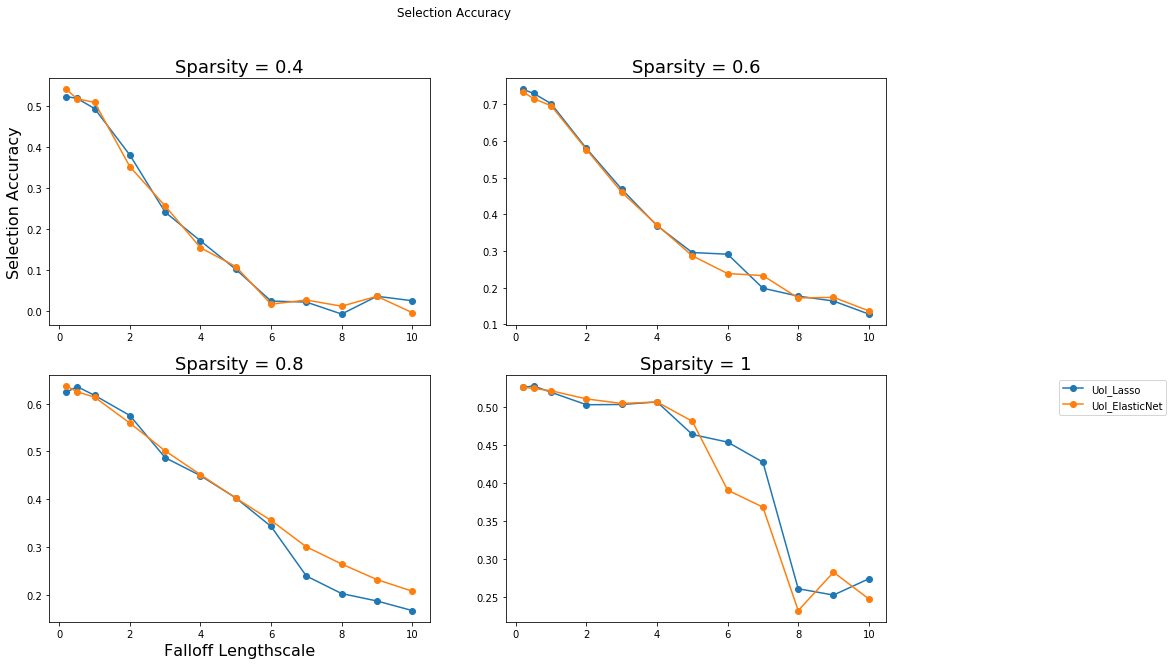

In [73]:
plot_data('AICc', 1)

In [77]:
sys.path

['',
 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\python36.zip',
 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\DLLs',
 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\lib',
 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse',
 'C:\\Users\\Ankit\\AppData\\Roaming\\Python\\Python36\\site-packages',
 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\lib\\site-packages',
 'c:\\users\\ankit\\nse\\pyuoi',
 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\lib\\site-packages\\win32',
 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Ankit\\.ipython',
 'C:\\Users\\Ankit\\nse',
 'C:\\Users\\Ankit\\nse\\pyuoi',
 'C:\\Users\\Ankit\\nse\\uoicorr']